# | Visualisations simples  

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# le chemin où se trouve le fichier CSV nettoyé
base_path = './'
csv_file = os.path.join(base_path, 'data/dataframe_2016_to_2019.csv')

def load_play_by_play_data(csv_file):
    """
    Load play-by-play data from a CSV file.
    """
    if os.path.exists(csv_file):
        return pd.read_csv(csv_file)
    else:
        print(f"File {csv_file} not found.")
        return None

data = load_play_by_play_data(csv_file)
if data is not None:
    print("Données chargées avec succès.")
else:
    print("Erreur lors du chargement des données.")


Données chargées avec succès.


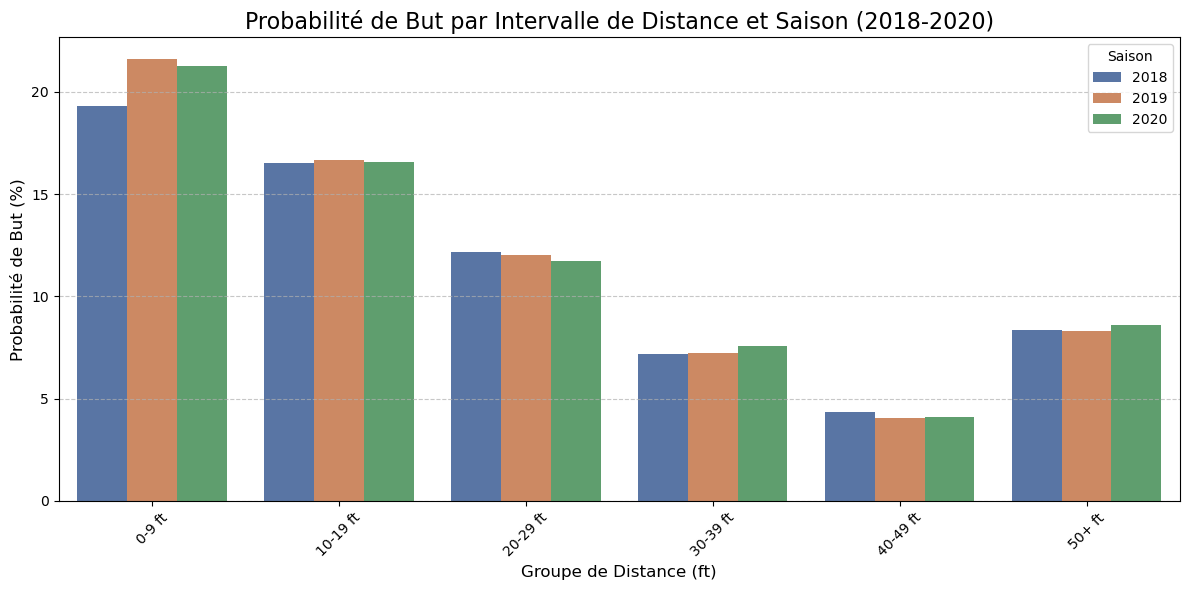

In [5]:
""" 
On ajuste les coordonnées x et y en fonction de la période et du code de zone.

En hockey, on inverse la patinoire à la deuxième période pour les deux équipes.
On ajuste la coordonnée x en la retournant pour les actions dans les zones défensives ou neutres
selon la période. Les actions dans la zone offensive restent généralement dans la même direction.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compute_shot_distance(row):
    x = row['xCoord']
    y = row['yCoord']
    goal_position = (89, 0)
    return np.sqrt((x - goal_position[0])**2 + (y - goal_position[1])**2)

def categorize_distance(distance):
    if distance < 10:
        return '0-9 ft'
    elif 10 <= distance < 20:
        return '10-19 ft'
    elif 20 <= distance < 30:
        return '20-29 ft'
    elif 30 <= distance < 40:
        return '30-39 ft'
    elif 40 <= distance < 50:
        return '40-49 ft'
    else:
        return '50+ ft'

def plot_goal_probability_grouped_barplot(data):
    """Trace un barplot groupé montrant la probabilité de but par distance et saison."""
    data = data.copy()
    data['shot_distance'] = data.apply(compute_shot_distance, axis=1)
    data['is_goal'] = data['Type'].apply(lambda x: 1 if x == 'But' else 0)
    data['season'] = data['idGame'].astype(str).str[:4]
    data_filtered = data[data['season'].isin(['2018', '2019', '2020'])].copy()
    data_filtered['distance_group'] = data_filtered['shot_distance'].apply(categorize_distance)
    grouped = data_filtered.groupby(['season', 'distance_group']).agg(
        total_shots=('Type', 'count'),
        total_goals=('is_goal', 'sum')
    ).reset_index()
    grouped['goal_probability'] = (grouped['total_goals'] / grouped['total_shots']) * 100
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped, x='distance_group', y='goal_probability', hue='season', palette='deep')
    plt.title('Probabilité de But par Intervalle de Distance et Saison (2018-2020)', fontsize=16)
    plt.xlabel('Groupe de Distance (ft)', fontsize=12)
    plt.ylabel('Probabilité de But (%)', fontsize=12)
    plt.legend(title='Saison', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_goal_probability_grouped_barplot(data)


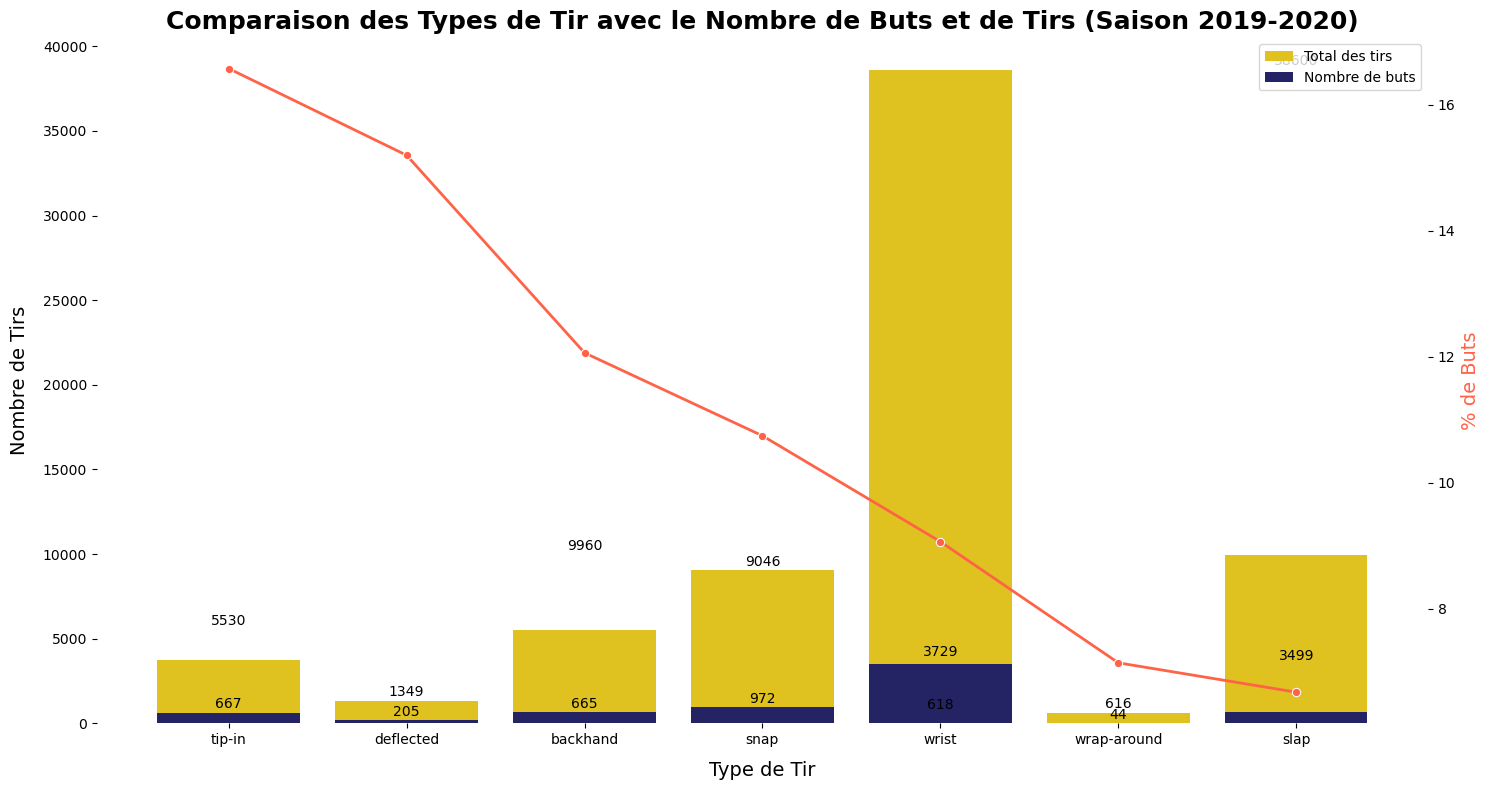

In [6]:
""" 
On définit la palette de couleurs, assure que 'idGame' est au format string, filtre les données 
pour la saison 2019-2020, supprime les types de tir 'Unknown', agrège les données, calcule le pourcentage de buts, 
trie les types de tirs par pourcentage de buts décroissant, puis crée un graphique épuré comparant les types de tir avec le nombre de buts et de tirs.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gold='#FFD700'
midnight_blue='#191970'
red='#FF6347'

data['idGame']=data['idGame'].astype(str)
data_filtered=data[data['idGame'].str.startswith('2019')]
data_filtered=data_filtered[data_filtered['Type de tir']!='Unknown']
tir_stats=data_filtered.groupby('Type de tir').agg(
    total_shots=('Type','count'),
    total_goals=('Type', lambda x: (x=='But').sum())
).reset_index()
tir_stats['goal_percentage']=(tir_stats['total_goals']/tir_stats['total_shots'])*100
tir_stats=tir_stats.sort_values(by='goal_percentage', ascending=False)

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(data=tir_stats, x='Type de tir', y='total_shots', ax=ax1, color=gold, label='Total des tirs')
sns.barplot(data=tir_stats, x='Type de tir', y='total_goals', ax=ax1, color=midnight_blue, label='Nombre de buts')
ax2=ax1.twinx()
sns.lineplot(data=tir_stats, x='Type de tir', y='goal_percentage', ax=ax2, marker='o', color=red, linewidth=2)

for index, row in tir_stats.iterrows():
    ax1.text(index, row['total_shots']+100, f"{row['total_shots']}", ha='center', va='bottom', fontsize=10, color='black')
    ax1.text(index, row['total_goals']+50, f"{row['total_goals']}", ha='center', va='bottom', fontsize=10, color='black')

ax1.set_title('Comparaison des Types de Tir avec le Nombre de Buts et de Tirs (Saison 2019-2020)', fontsize=18, weight='bold')
ax1.set_xlabel('Type de Tir', fontsize=14, labelpad=10)
ax1.set_ylabel('Nombre de Tirs', fontsize=14, labelpad=10)
ax2.set_ylabel('% de Buts', fontsize=14, color=red)
plt.xticks(rotation=45, ha='right', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


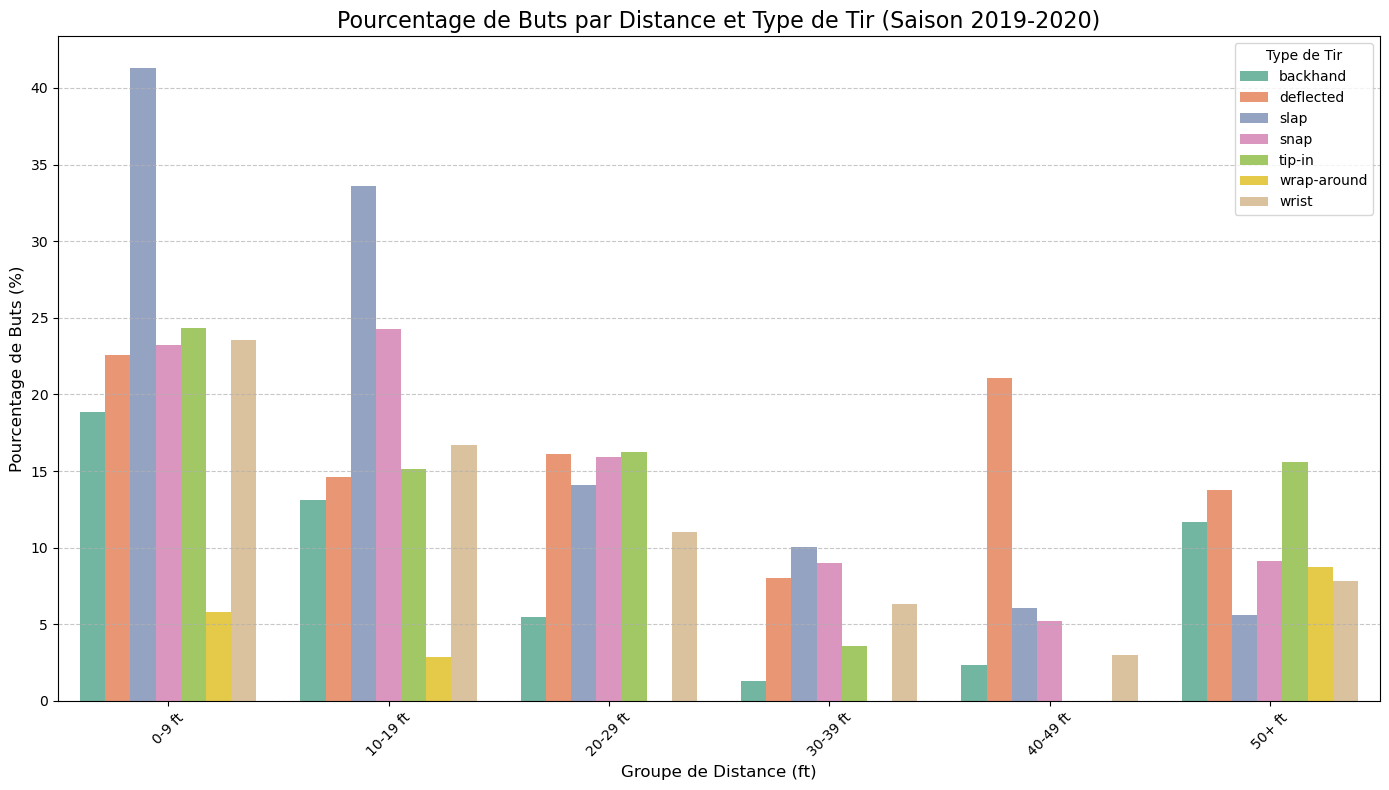

In [7]:
""" 
On définit les fonctions et le graphique pour analyser le pourcentage de buts en fonction de la distance et du type de tir pour une saison donnée.
"""

def compute_shot_distance(row):
    x=row['xCoord']
    y=row['yCoord']
    goal_position=(89,0)
    return np.sqrt((x - goal_position[0])**2 + (y - goal_position[1])**2)

def categorize_distance(distance):
    if distance <10:return '0-9 ft'
    elif 10<=distance<20:return '10-19 ft'
    elif 20<=distance<30:return '20-29 ft'
    elif 30<=distance<40:return '30-39 ft'
    elif 40<=distance<50:return '40-49 ft'
    else:return '50+ ft'

def plot_shot_type_vs_distance(data, season='2019'):
    """on ttrace un graphique montrant le pourcentage de buts en fonction de la distance et du type de tir pour une saison donnée."""
    data_season=data[data['idGame'].astype(str).str.startswith(season)].copy()
    data_season=data_season[data_season['Type de tir']!='Unknown']
    data_season['shot_distance']=data_season.apply(compute_shot_distance, axis=1)
    data_season['is_goal']=data_season['Type'].apply(lambda x:1 if x=='But' else 0)
    data_season['distance_group']=data_season['shot_distance'].apply(categorize_distance)
    grouped=data_season.groupby(['Type de tir','distance_group']).agg(
        total_shots=('Type','count'),
        total_goals=('is_goal','sum')
    ).reset_index()
    grouped['goal_percentage']=(grouped['total_goals']/grouped['total_shots'])*100
    plt.figure(figsize=(14,8))
    sns.barplot(data=grouped, x='distance_group', y='goal_percentage', hue='Type de tir', palette='Set2')
    plt.title(f'Pourcentage de Buts par Distance et Type de Tir (Saison {season}-{int(season)+1})', fontsize=16)
    plt.xlabel('Groupe de Distance (ft)', fontsize=12)
    plt.ylabel('Pourcentage de Buts (%)', fontsize=12)
    plt.legend(title='Type de Tir', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_shot_type_vs_distance(data, season='2019')
